In [105]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy import signal as sp
def funcion_sen(ff,nn,vmax=1,dc=0,ph=0,fs=2):
    
    t=np.arange(0,(nn)/fs,1/fs)
   
    y=vmax*np.sin(ff*2*np.pi*t-ph)+dc
    
    return t,y 

In [106]:
N=100

respuesta_impulso=np.zeros(N)
respuesta_impulso
x=np.zeros(N)
x[0]=1
for n in np.arange(N):
    respuesta_impulso[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*respuesta_impulso[n-1]-0.5*respuesta_impulso[n-2]

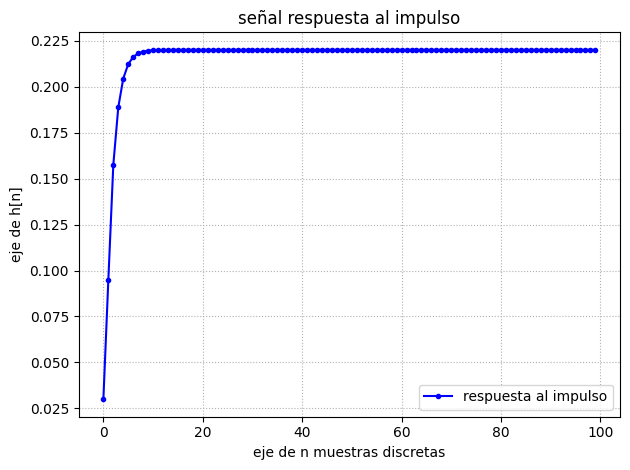

In [107]:
plt.plot(np.arange(N),respuesta_impulso, label="respuesta al impulso",linestyle='-',marker='.' ,color='b')
plt.legend()
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal respuesta al impulso")
plt.draw()
plt.tight_layout() 

plt.show()

la respuesta al impulso obteniada a traves de la ecuacion en diferencias podemos asemejarla que a tiempos(o en nuestro caso muestras) infinito la señal se comportaria como la señal escalon unitario u(t) la cual se decribe por
\begin{equation}
u(x)= \left\{ \begin{array}{lcc} 0 & si & t< 0 \\ \\ 1 & si & t \geq 0  \end{array} \right.
\end{equation}
multiplicado por un coeficiente C el cual es aproximadamente 0.22 por lo tanto nuestra u(t) a tiempo infinito seria:
\begin{equation}
u(x)= \left\{ \begin{array}{lcc} 0 & si & t< 0 \\ \\ 0.22 & si & t \geq 0  \end{array} \right.
\end{equation}


Muestras 100 frecuencia de muestro 66666.67 energia de la señal 186.13


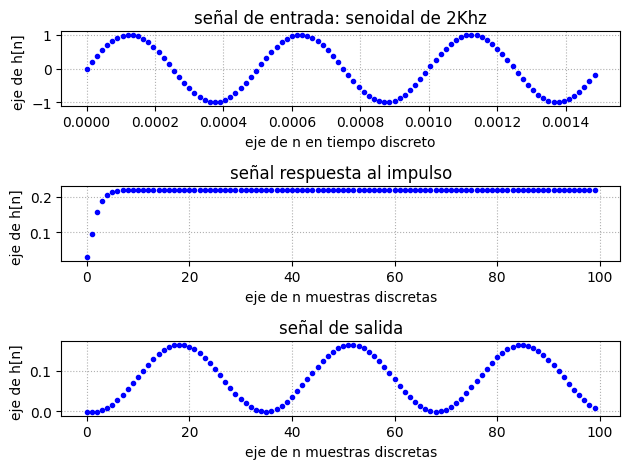

In [108]:
f=2000
N=100
numero_periodos=3
fs=N*f/numero_periodos

h=np.zeros(N)


t , x = funcion_sen(ff=2000,nn=N,fs=fs)


for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]

energia=np.sum(h**2) 
plt.subplot(3,1,1)
plt.plot(np.arange(N)/fs,x,linestyle='',marker='.' ,color='b')
plt.title("señal de entrada: senoidal de 2Khz")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(3,1,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(3,1,3)
plt.plot(np.arange(N),h/np.sqrt(np.sum(np.abs(h**2))),linestyle='',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"energia de la señal",round(energia,2))

como sabemos, al insertar una señal de entrada a la ecuacion de diferencias, obtemos la convolucion entre la señal de entrada y la respuesta al impulso.entonces el resultado obtenido podemos asemejarlo a la funcion
\begin{equation}
h(x)=1-cos(wx)
\end{equation}

Muestras 100 frecuencia de muestro 66666.67 energia de la señal 600.47


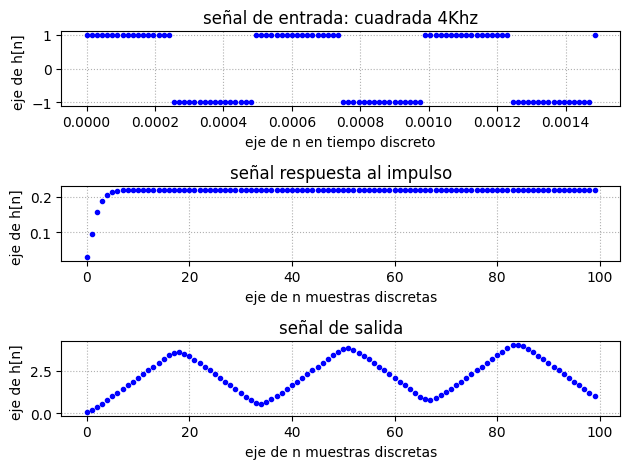

In [96]:
N=100
ff=4000
numero_periodos=3
fs=N*f/numero_periodos
t=np.linspace(0,3/ff,N)
x=sp.square(2 * np.pi * ff * t)

h=np.zeros(N)
for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]

energia=np.sum(h**2) 

plt.subplot(3,1,1)
plt.plot(np.arange(N)/fs,x,linestyle='',marker='.' ,color='b')
plt.title("señal de entrada: cuadrada 4Khz")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(3,1,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(3,1,3)
plt.plot(np.arange(N),h,linestyle='',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"energia de la señal",round(energia,2))

Muestras 100 frecuencia de muestro 66666.67 energia de la señal 180.33


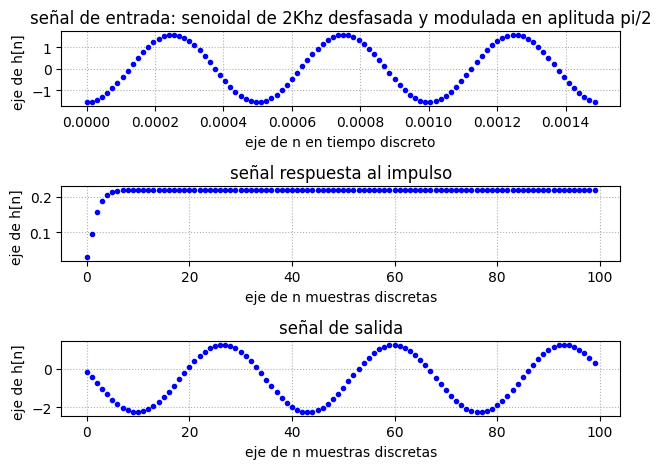

In [97]:
f=2000
N=100
fs=N
numero_periodos=3
fs=N*f/numero_periodos
t,x=funcion_sen(ff=f,nn=N,fs=fs,vmax=np.pi/2,ph=np.pi/2)
h=np.zeros(N)

for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]
    
energia=np.sum(h**2) 
plt.subplot(3,1,1)
plt.plot(np.arange(N)/fs,x,linestyle='',marker='.' ,color='b')
plt.title("señal de entrada: senoidal de 2Khz desfasada y modulada en aplituda pi/2")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(3,1,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(3,1,3)
plt.plot(np.arange(N),h,linestyle='',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"energia de la señal",round(energia,2))

Muestras 100 frecuencia de muestro 10.0 energia de la señal 443.49


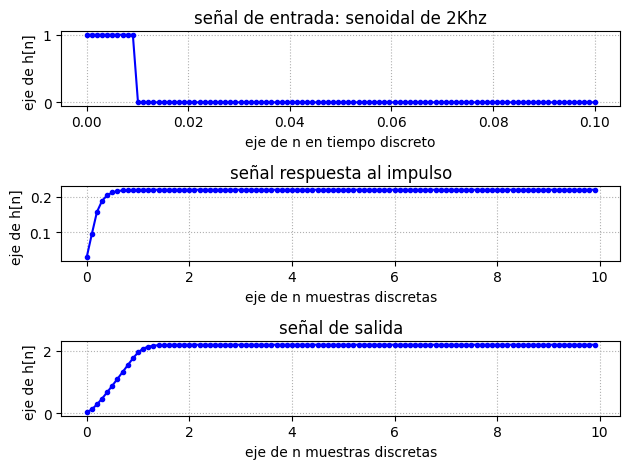

In [98]:
N=100
fs=N/10
t=np.linspace(0,1/10,N)

x=np.zeros(N,dtype=float)
for k in np.arange(0,N):
    if(t[k]<0.01):
        
        x[k]=1
    else:
        x[k]=0
        
h=np.zeros(N)
for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]

energia=np.sum(h**2) 
plt.subplot(3,1,1)
plt.plot(t,x,linestyle='-',marker='.' ,color='b')
plt.title("señal de entrada: senoidal de 2Khz")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(3,1,2)
plt.plot(np.arange(N)/fs,respuesta_impulso,linestyle='-',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(3,1,3)
plt.plot(np.arange(N)/fs,h,linestyle='-',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"energia de la señal",round(energia,2))

Text(0.5, 1.0, 'señal respuesta al impulso')

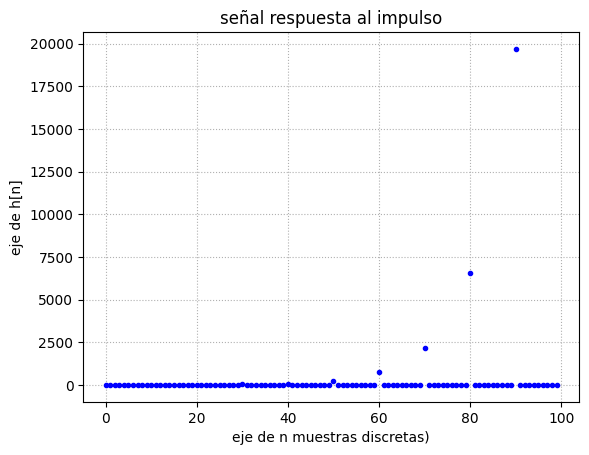

In [99]:

N=100
numero_periodos=3
fs=N*f/3

respuesta_impulso=np.zeros(N)


x=np.zeros(N)
x[0]=1

for n in np.arange(N):
    respuesta_impulso[n]=x[n]+3*respuesta_impulso[n-10]

plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas)')
plt.ylabel('eje de h[n]')
plt.title("señal respuesta al impulso")


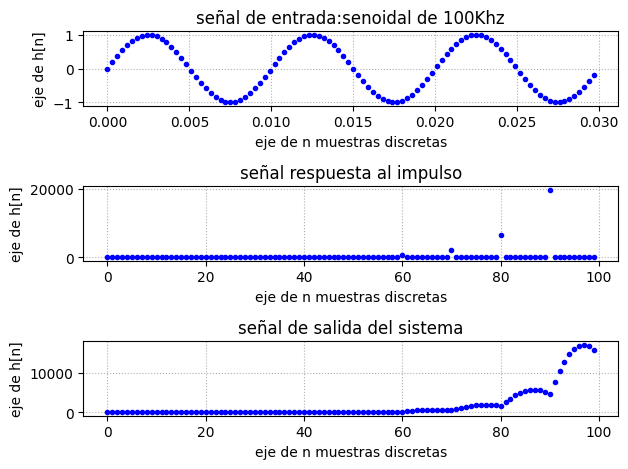

In [100]:
f=100
numero_periodos=3
fs=N*f/3

h=np.zeros(N)


t,x=funcion_sen(ff=f,nn=N,fs=fs)


for n in np.arange(N):
    h[n]=x[n]+3*h[n-10]

plt.subplot(3,1,1)
plt.plot(t,x,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal de entrada:senoidal de 100Khz")
plt.subplot(3,1,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal respuesta al impulso")
plt.subplot(3,1,3)
plt.plot(np.arange(N),h,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal de salida del sistema")
plt.tight_layout() 

Text(0, 0.5, 'eje de h[n]')

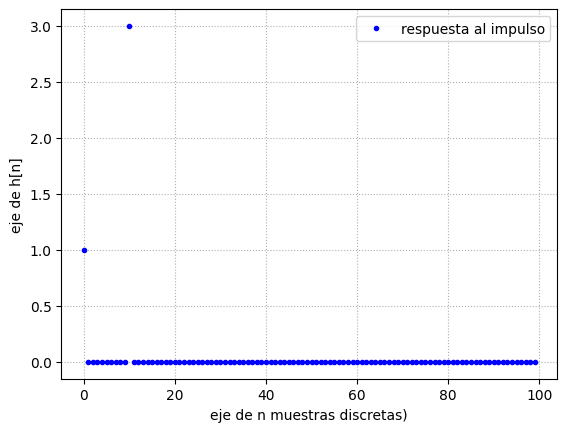

In [110]:
N=100
numero_periodos=3
fs=N*f/3

respuesta_impulso=np.zeros(N)


x=np.zeros(N)
x[0]=1

for n in np.arange(N):
    respuesta_impulso[n]=x[n]+3*x[n-10]

plt.plot(np.arange(N),respuesta_impulso, label="respuesta al impulso",linestyle='',marker='.' ,color='b')
plt.legend()
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas)')
plt.ylabel('eje de h[n]')



la respuesta al impulso se asemeja a la suma de dos funciones deltas desfasadas entre si por 10 muestra siendo una el triple del valor de la otra
\begin{equation}
h[n]= \delta[n]+3\delta[n-10]
\end{equation}

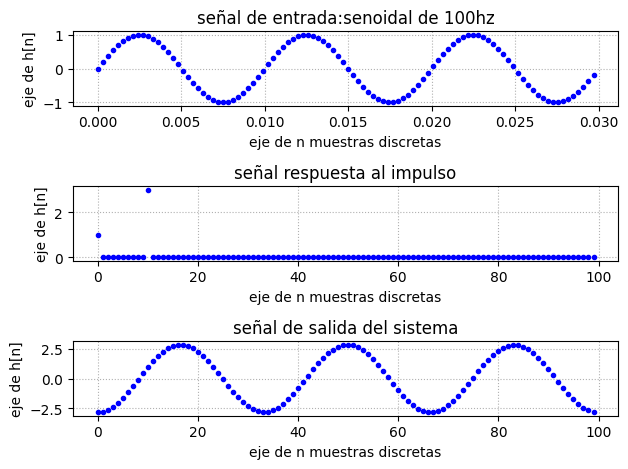

In [114]:

f=100
N=100
numero_periodos=3
fs=N*f/3

h=np.zeros(N)


t,x=funcion_sen(ff=f,nn=N,fs=fs)

respuesta_impulso=np.zeros(N)

delta=np.zeros(N)
delta[0]=1
for n in np.arange(N):
    h[n]=x[n]+3*x[n-10]
    respuesta_impulso[n]=delta[n]+3*delta[n-10]

plt.figure(1)
plt.subplot(3,1,1)
plt.plot(t,x,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal de entrada:senoidal de 100hz")
plt.subplot(3,1,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal respuesta al impulso")
plt.subplot(3,1,3)
plt.plot(np.arange(N),h,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal de salida del sistema")
plt.tight_layout() 

como habiamos dicho anteriormente la respuesta al impulso de la ecuacion en diferencias es una suma de funciones delta,por lo tanto si lo pasamos a terminos de la combolucion,gracias a que esta ultmia es distributiba, podemos obtener enetonces que la señal de salida es una suma de senos desfasados y modulados en amplitud tal que
\begin{equation}
h(x)=sen(2*\pi*100*x)+3*sen(2*\pi*100*(x-10))
\end{equation}